In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gan-getting-started/monet_jpg/9ae6552353.jpg
/kaggle/input/gan-getting-started/monet_jpg/e37407c747.jpg
/kaggle/input/gan-getting-started/monet_jpg/79292e1434.jpg
/kaggle/input/gan-getting-started/monet_jpg/5c79cfe0b3.jpg
/kaggle/input/gan-getting-started/monet_jpg/281b73fb5e.jpg
/kaggle/input/gan-getting-started/monet_jpg/16dabe418c.jpg
/kaggle/input/gan-getting-started/monet_jpg/7cb36714d0.jpg
/kaggle/input/gan-getting-started/monet_jpg/8e5ff15568.jpg
/kaggle/input/gan-getting-started/monet_jpg/3eaef3ee43.jpg
/kaggle/input/gan-getting-started/monet_jpg/ad0101d010.jpg
/kaggle/input/gan-getting-started/monet_jpg/d729785cb8.jpg
/kaggle/input/gan-getting-started/monet_jpg/463835bbc6.jpg
/kaggle/input/gan-getting-started/monet_jpg/bbc5ac4564.jpg
/kaggle/input/gan-getting-started/monet_jpg/52aed0f943.jpg
/kaggle/input/gan-getting-started/monet_jpg/e3112413b1.jpg
/kaggle/input/gan-getting-started/monet_jpg/23f0fbd77e.jpg
/kaggle/input/gan-getting-started/monet_jpg/990ed28f62.j

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

from kaggle_datasets import KaggleDatasets
import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:68: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.3.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [3]:

AUTOTUNE = tf.data.experimental.AUTOTUNE
    
print(tf.__version__)

2.3.0


In [4]:
GCS_PATH=KaggleDatasets().get_gcs_path()

In [5]:
monet_filenames=tf.io.gfile.glob(str(GCS_PATH+'/monet_tfrec/*.tfrec'))
photo_filenames=tf.io.gfile.glob(str(GCS_PATH + '/photo_tfrec/*.tfrec'))

In [6]:
print('monet_filenames',len(monet_filenames))
print('photo_filenames',len(photo_filenames))

monet_filenames 5
photo_filenames 20


In [7]:
image_size=[256,256]
def decode_img(img):
    img=tf.image.decode_image(img,channels=3)
    img=(tf.cast(img,tf.float32)/127.5)-1
    img=tf.reshape(img,[*image_size,3])
    return img

In [8]:
def read_tfrecord(example):
    tfrecord_format = {
        "image_name": tf.io.FixedLenFeature([], tf.string),
        "image": tf.io.FixedLenFeature([], tf.string),
        "target": tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_img(example['image'])
    return image

In [9]:
def load_dataset(filenames,labeled=True,ordered=False):
    dataset=tf.data.TFRecordDataset(filenames)
    dataset=dataset.map(read_tfrecord,num_parallel_calls=AUTOTUNE)
    return dataset

In [10]:
monet_ds=load_dataset(monet_filenames,labeled=True).batch(1)
photo_ds=load_dataset(photo_filenames,labeled=True).batch(1)

In [11]:
print(next(iter(monet_ds)))

tf.Tensor(
[[[[-0.69411767 -0.5529412  -1.        ]
   [-0.5058824  -0.372549   -0.8039216 ]
   [-0.1372549  -0.00392157 -0.35686272]
   ...
   [-0.05882353  0.09019613 -0.06666666]
   [-0.14509803  0.0196079  -0.12941176]
   [-0.08235294  0.09803927 -0.05882353]]

  [[-0.27843136 -0.3960784  -0.85882354]
   [-0.17647058 -0.24705881 -0.6784314 ]
   [ 0.03529418  0.00392163 -0.36470586]
   ...
   [-0.01176471  0.13725495  0.09019613]
   [-0.08235294  0.082353    0.02745104]
   [-0.02745098  0.15294123  0.09019613]]

  [[-0.11372548 -0.23137254 -0.7411765 ]
   [-0.00392157 -0.09803921 -0.5686275 ]
   [ 0.11372554  0.05882359 -0.36470586]
   ...
   [ 0.00392163  0.18431377  0.2313726 ]
   [-0.05882353  0.12941182  0.16078436]
   [-0.01960784  0.1686275   0.20000005]]

  ...

  [[-0.38039213 -0.29411763 -0.56078434]
   [-0.46666664 -0.38039213 -0.64705884]
   [-0.5372549  -0.45098037 -0.7019608 ]
   ...
   [-0.05882353  0.07450986 -0.19215685]
   [-0.08235294  0.0196079  -0.32549018]
   [-

In [12]:
example_monet = next(iter(monet_ds))
example_photo = next(iter(photo_ds))

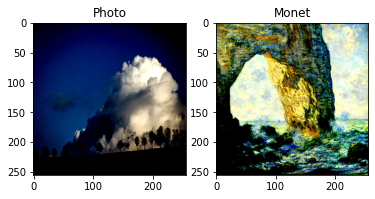

In [13]:
plt.subplot(121)
plt.title('Photo')
plt.imshow(example_photo[0] + 0.5 * 0.5)
plt.subplot(122)
plt.title('Monet')
plt.imshow(example_monet[0] + 0.5 * 0.5)

In [14]:
output_channels=3
def downsample(filters,size,apply_instancenorm=True):
    initializer=tf.random_normal_initializer(0.,0.02)
    gamma_init=keras.initializers.RandomNormal(mean=0.0,stddev=0.02)
    result=keras.Sequential()
    result.add(layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))
    if apply_instancenorm:
        result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    result.add(layers.LeakyReLU())

    return result

In [15]:
def upsample(filters,size,apply_dropout=False):
    initializer=tf.random_normal_initializer(0.,0.02)
    gamma_init=keras.initializers.RandomNormal(mean=0.0,stddev=0.02)
    result=keras.Sequential()
    result.add(layers.Conv2DTranspose(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))
    if apply_dropout:
        result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    result.add(layers.ReLU())

    return result

In [16]:
def unet_generator():
    inputs = layers.Input(shape=[256,256,3])
    down_stack = [
        downsample(64, 4, apply_instancenorm=False), # (bs, 128, 128, 64)
        downsample(128, 4), # (bs, 64, 64, 128)
        downsample(256, 4), # (bs, 32, 32, 256)
        downsample(512, 4), # (bs, 16, 16, 512)
        downsample(512, 4), # (bs, 8, 8, 512)
        downsample(512, 4), # (bs, 4, 4, 512)
        downsample(512, 4), # (bs, 2, 2, 512)
        downsample(512, 4), # (bs, 1, 1, 512)
    ]

    up_stack = [
        upsample(512, 4, apply_dropout=True), # (bs, 2, 2, 1024)
        upsample(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
        upsample(512, 4, apply_dropout=True), # (bs, 8, 8, 1024)
        upsample(512, 4), # (bs, 16, 16, 1024)
        upsample(256, 4), # (bs, 32, 32, 512)
        upsample(128, 4), # (bs, 64, 64, 256)
        upsample(64, 4), # (bs, 128, 128, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = layers.Conv2DTranspose(output_channels, 4,
                                  strides=2,
                                  padding='same',
                                  kernel_initializer=initializer,
                                  activation='tanh') # (bs, 256, 256, 3)

    x = inputs    
    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = layers.Concatenate()([x, skip])

    x = last(x)

    return keras.Model(inputs=inputs, outputs=x)   

In [17]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    inp = layers.Input(shape=[256, 256, 3], name='input_image')

    x = inp

    down1 = downsample(64, 4, False)(x) # (bs, 128, 128, 64)
    down2 = downsample(128, 4)(down1) # (bs, 64, 64, 128)
    down3 = downsample(256, 4)(down2) # (bs, 32, 32, 256)

    zero_pad1 = layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
    conv = layers.Conv2D(512, 4, strides=1,
                         kernel_initializer=initializer,
                         use_bias=False)(zero_pad1) # (bs, 31, 31, 512)

    norm1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv)

    leaky_relu = layers.LeakyReLU()(norm1)

    zero_pad2 = layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)

    last = layers.Conv2D(1, 4, strides=1,
                         kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

    return tf.keras.Model(inputs=inp, outputs=last)

In [18]:

monet_generator = unet_generator() # transforms photos to Monet-esque paintings
photo_generator = unet_generator() # transforms Monet paintings to be more like photos

monet_discriminator = Discriminator() # differentiates real Monet paintings and generated Monet paintings
photo_discriminator = Discriminator() # differentiates real photos and generated photos

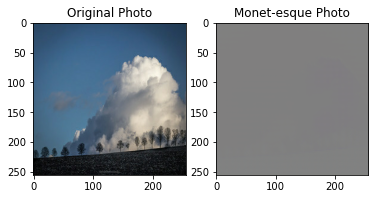

In [19]:
to_monet = monet_generator(example_photo)

plt.subplot(1, 2, 1)
plt.title("Original Photo")
plt.imshow(example_photo[0] * 0.5 + 0.5)

plt.subplot(1, 2, 2)
plt.title("Monet-esque Photo")
plt.imshow(to_monet[0] * 0.5 + 0.5)
plt.show()

In [20]:
class CycleGan(keras.Model):
    def __init__(
        self,
        monet_generator,
        photo_generator,
        monet_discriminator,
        photo_discriminator,
        lambda_cycle=10,
    ):
        super(CycleGan, self).__init__()
        self.m_gen = monet_generator
        self.p_gen = photo_generator
        self.m_disc = monet_discriminator
        self.p_disc = photo_discriminator
        self.lambda_cycle = lambda_cycle
        
    def compile(
        self,
        m_gen_optimizer,
        p_gen_optimizer,
        m_disc_optimizer,
        p_disc_optimizer,
        gen_loss_fn,
        disc_loss_fn,
        cycle_loss_fn,
        identity_loss_fn
    ):
        super(CycleGan, self).compile()
        self.m_gen_optimizer = m_gen_optimizer
        self.p_gen_optimizer = p_gen_optimizer
        self.m_disc_optimizer = m_disc_optimizer
        self.p_disc_optimizer = p_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn
        
    def train_step(self, batch_data):
        real_monet, real_photo = batch_data
        
        with tf.GradientTape(persistent=True) as tape:
            # photo to monet back to photo
            fake_monet = self.m_gen(real_photo, training=True)
            cycled_photo = self.p_gen(fake_monet, training=True)

            # monet to photo back to monet
            fake_photo = self.p_gen(real_monet, training=True)
            cycled_monet = self.m_gen(fake_photo, training=True)

            # generating itself
            same_monet = self.m_gen(real_monet, training=True)
            same_photo = self.p_gen(real_photo, training=True)

            # discriminator used to check, inputing real images
            disc_real_monet = self.m_disc(real_monet, training=True)
            disc_real_photo = self.p_disc(real_photo, training=True)

            # discriminator used to check, inputing fake images
            disc_fake_monet = self.m_disc(fake_monet, training=True)
            disc_fake_photo = self.p_disc(fake_photo, training=True)

            # evaluates generator loss
            monet_gen_loss = self.gen_loss_fn(disc_fake_monet)
            photo_gen_loss = self.gen_loss_fn(disc_fake_photo)

            # evaluates total cycle consistency loss
            total_cycle_loss = self.cycle_loss_fn(real_monet, cycled_monet, self.lambda_cycle) + self.cycle_loss_fn(real_photo, cycled_photo, self.lambda_cycle)

            # evaluates total generator loss
            total_monet_gen_loss = monet_gen_loss + total_cycle_loss + self.identity_loss_fn(real_monet, same_monet, self.lambda_cycle)
            total_photo_gen_loss = photo_gen_loss + total_cycle_loss + self.identity_loss_fn(real_photo, same_photo, self.lambda_cycle)

            # evaluates discriminator loss
            monet_disc_loss = self.disc_loss_fn(disc_real_monet, disc_fake_monet)
            photo_disc_loss = self.disc_loss_fn(disc_real_photo, disc_fake_photo)

        # Calculate the gradients for generator and discriminator
        monet_generator_gradients = tape.gradient(total_monet_gen_loss,
                                                  self.m_gen.trainable_variables)
        photo_generator_gradients = tape.gradient(total_photo_gen_loss,
                                                  self.p_gen.trainable_variables)

        monet_discriminator_gradients = tape.gradient(monet_disc_loss,
                                                      self.m_disc.trainable_variables)
        photo_discriminator_gradients = tape.gradient(photo_disc_loss,
                                                      self.p_disc.trainable_variables)

        # Apply the gradients to the optimizer
        self.m_gen_optimizer.apply_gradients(zip(monet_generator_gradients,
                                                 self.m_gen.trainable_variables))

        self.p_gen_optimizer.apply_gradients(zip(photo_generator_gradients,
                                                 self.p_gen.trainable_variables))

        self.m_disc_optimizer.apply_gradients(zip(monet_discriminator_gradients,
                                                  self.m_disc.trainable_variables))

        self.p_disc_optimizer.apply_gradients(zip(photo_discriminator_gradients,
                                                  self.p_disc.trainable_variables))
        
        return {
            "monet_gen_loss": total_monet_gen_loss,
            "photo_gen_loss": total_photo_gen_loss,
            "monet_disc_loss": monet_disc_loss,
            "photo_disc_loss": photo_disc_loss
        }

In [21]:
LAMBDA = 10
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [22]:
def discriminator_loss(real, generated):
    real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(real), real)

    generated_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.zeros_like(generated), generated)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss * 0.5

In [23]:
def generator_loss(generated):
        return tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(generated), generated)

def calc_cycle_loss(real_image, cycled_image, LAMBDA):
    loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

    return LAMBDA * loss1


In [24]:
def identity_loss(real_image, same_image, LAMBDA):
    loss = tf.reduce_mean(tf.abs(real_image - same_image))
    return LAMBDA * 0.5 * loss

In [25]:

monet_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
photo_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

monet_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
photo_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [26]:
cycle_gan_model = CycleGan(
        monet_generator, photo_generator, monet_discriminator, photo_discriminator
    )

cycle_gan_model.compile(
        m_gen_optimizer = monet_generator_optimizer,
        p_gen_optimizer = photo_generator_optimizer,
        m_disc_optimizer = monet_discriminator_optimizer,
        p_disc_optimizer = photo_discriminator_optimizer,
        gen_loss_fn = generator_loss,
        disc_loss_fn = discriminator_loss,
        cycle_loss_fn = calc_cycle_loss,
        identity_loss_fn = identity_loss
    )

In [27]:
cycle_gan_model.fit(
    tf.data.Dataset.zip((monet_ds, photo_ds)),
    epochs=25
)


Epoch 1/25
300/300 [==============================] - 75s 252ms/step - monet_gen_loss: 5.4647 - photo_gen_loss: 5.6373 - monet_disc_loss: 0.6479 - photo_disc_loss: 0.6083
Epoch 2/25
300/300 [==============================] - 75s 251ms/step - monet_gen_loss: 3.7708 - photo_gen_loss: 3.8696 - monet_disc_loss: 0.6548 - photo_disc_loss: 0.6312
Epoch 3/25
300/300 [==============================] - 75s 251ms/step - monet_gen_loss: 3.6372 - photo_gen_loss: 3.7334 - monet_disc_loss: 0.6496 - photo_disc_loss: 0.6296
Epoch 4/25
300/300 [==============================] - 76s 252ms/step - monet_gen_loss: 3.5482 - photo_gen_loss: 3.6069 - monet_disc_loss: 0.6343 - photo_disc_loss: 0.6244
Epoch 5/25
300/300 [==============================] - 75s 251ms/step - monet_gen_loss: 3.3938 - photo_gen_loss: 3.4946 - monet_disc_loss: 0.6342 - photo_disc_loss: 0.6116
Epoch 6/25
300/300 [==============================] - 75s 250ms/step - monet_gen_loss: 3.2604 - photo_gen_loss: 3.3457 - monet_disc_loss: 0.6195 

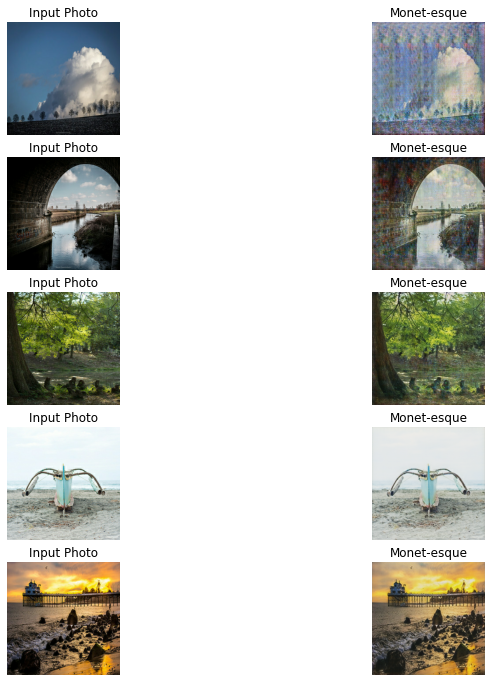

In [28]:
_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(photo_ds.take(5)):
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show()

In [29]:
import PIL
! mkdir ../images

In [30]:
i = 1
for img in photo_ds:
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    im = PIL.Image.fromarray(prediction)
    im.save("../images/" + str(i) + ".jpg")
    i += 1 

In [31]:
import shutil
shutil.make_archive("/kaggle/working/images", 'zip', "/kaggle/images")

'/kaggle/working/images.zip'